
# Multiple Linear Regression Tutorial (Scratch vs Scikit-learn)

In this notebook, we will explore **Multiple Linear Regression (MLR)** using the dataset:

| Area (sq.ft) | Bedrooms | Price (k$) |
|--------------|----------|-------------|
| 1000         | 2        | 250         |
| 1500         | 3        | 400         |
| 2000         | 4        | 450         |
| 2500         | 3        | 500         |
| 3000         | 5        | 550         |

We will solve MLR in two ways:
1. **From Scratch** using mathematical formulas and NumPy  
2. **Using scikit-learn** library  

Finally, we will evaluate the model using:
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- R² (Coefficient of Determination)


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset
data = {
    "Area":     [1000, 1500, 2000, 2500, 3000],
    "Bedrooms": [2,    3,    4,    3,    5],
    "Price":    [250,  400,  450,  500,  550]
}
df = pd.DataFrame(data)
df


,Area,Bedrooms,Price
0,1000,2,250
1,1500,3,400
2,2000,4,450
3,2500,3,500
4,3000,5,550



## Multiple Linear Regression (Scratch)

We use the formula:

\[
y = b_0 + b_1 x_1 + b_2 x_2
\]

where:  
- \( x_1 \) = Area  
- \( x_2 \) = Bedrooms  
- \( y \) = Price  

We compute coefficients by solving the **normal equations**.


In [5]:

# Extract data
X1 = df["Area"].values
X2 = df["Bedrooms"].values
y  = df["Price"].values

# Means
mean_x1, mean_x2, mean_y = X1.mean(), X2.mean(), y.mean()

# Deviations
dx1, dx2, dy = X1 - mean_x1, X2 - mean_x2, y - mean_y

# Summations
S_x1x1 = np.sum(dx1 * dx1)
S_x2x2 = np.sum(dx2 * dx2)
S_x1x2 = np.sum(dx1 * dx2)
S_x1y  = np.sum(dx1 * dy)
S_x2y  = np.sum(dx2 * dy)

# Solve system
A = np.array([[S_x1x1, S_x1x2],
              [S_x1x2, S_x2x2]])
B = np.array([S_x1y, S_x2y])

b1, b2 = np.linalg.inv(A).dot(B)
b0 = mean_y - b1 * mean_x1 - b2 * mean_x2

print("Manual Regression Coefficients:")
print("Intercept b0 =", b0)
print("b1 (Area)    =", b1)
print("b2 (Bedrooms)=", b2)

# Predictions
y_pred_manual = b0 + b1*X1 + b2*X2

# Metrics
mse_manual = mean_squared_error(y, y_pred_manual)
rmse_manual = np.sqrt(mse_manual)
r2_manual = r2_score(y, y_pred_manual)

print("\nManual Evaluation Metrics:")
print("MSE  =", mse_manual)
print("RMSE =", rmse_manual)
print("R²   =", r2_manual)

pd.DataFrame({
    "Actual": y,
    "Predicted (Manual)": y_pred_manual,
    "Residual": y - y_pred_manual
})


Manual Regression Coefficients:
Intercept b0 = 137.5
b1 (Area)    = 0.12500000000000003
b2 (Bedrooms)= 12.49999999999998

Manual Evaluation Metrics:
MSE  = 749.9999999999989
RMSE = 27.386127875258286
R²   = 0.929245283018868


,Actual,Predicted (Manual),Residual
0,250,287.5,-37.5
1,400,362.5,37.5
2,450,437.5,12.5
3,500,487.5,12.5
4,550,575.0,-25.0



## Multiple Linear Regression (scikit-learn)

We now use the **LinearRegression** class from `sklearn` to fit the same dataset.


In [8]:

# Features and Target
X = df[["Area", "Bedrooms"]]
y = df["Price"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Coefficients
b0_skl = model.intercept_
b1_skl, b2_skl = model.coef_

print("scikit-learn Regression Coefficients:")
print("Intercept b0 =", b0_skl)
print("b1 (Area)    =", b1_skl)
print("b2 (Bedrooms)=", b2_skl)

# Predictions
y_pred_skl = model.predict(X)

# Metrics
mse_skl = mean_squared_error(y, y_pred_skl)
rmse_skl = np.sqrt(mse_skl)
r2_skl = r2_score(y, y_pred_skl)

print("\nscikit-learn Evaluation Metrics:")
print("MSE  =", mse_skl)
print("RMSE =", rmse_skl)
print("R²   =", r2_skl)

pd.DataFrame({
    "Actual": y,
    "Predicted (sklearn)": y_pred_skl,
    "Residual": y - y_pred_skl
})


scikit-learn Regression Coefficients:
Intercept b0 = 137.49999999999983
b1 (Area)    = 0.12500000000000008
b2 (Bedrooms)= 12.500000000000002

scikit-learn Evaluation Metrics:
MSE  = 749.9999999999989
RMSE = 27.386127875258286
R²   = 0.929245283018868


,Actual,Predicted (sklearn),Residual
0,250,287.5,-37.5
1,400,362.5,37.5
2,450,437.5,12.5
3,500,487.5,12.5
4,550,575.0,-25.0



## Model Evaluation Visualizations

We will compare **residuals** and **actual vs predicted** prices.


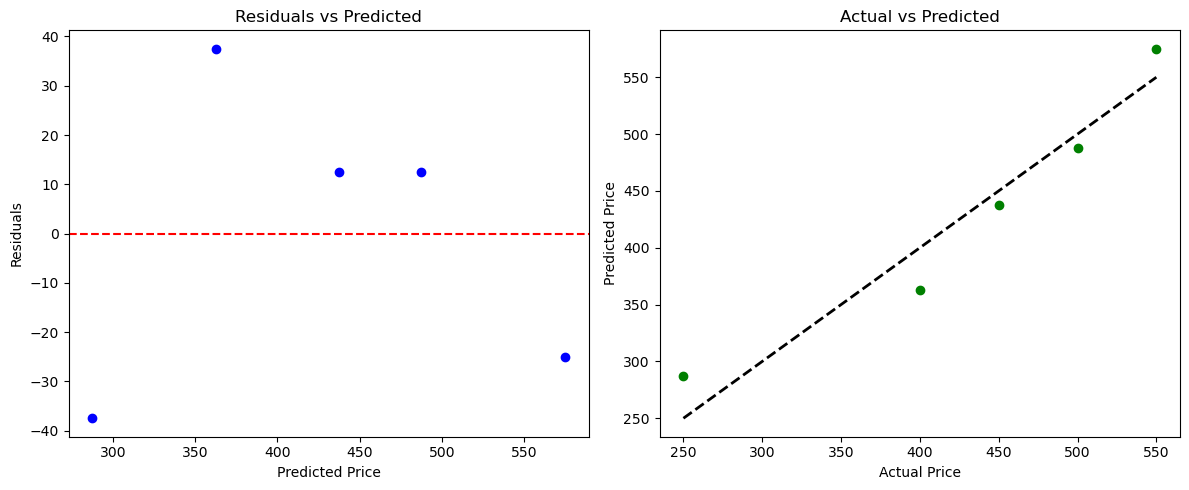

In [11]:

plt.figure(figsize=(12, 5))

# Residuals vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_pred_skl, y - y_pred_skl, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

# Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_skl, color='green')
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")

plt.tight_layout()
plt.show()
